# Perceptron: stochastic gradient descent
  
Quick visualization of a stochastic gradient descent for a perceptron that linearly classifies a dataset, followed by a comparaison with the results obtained with sklearn linear_model.SGDClassifier.

In [1]:
# Importing usefull packages and modules
import numpy as np
import matplotlib.pyplot as plt

# Importing manual SGD and plot methods
# @author: baskiotis, salmon, gramfort
from perceptron_source import (rand_gauss, rand_bi_gauss, plot_2d,
                               gradient, plot_gradient,
                               frontiere_new, 
                               mse_loss, gr_mse_loss)

# Sklearn linear_model for SGD comparaison
from sklearn import linear_model

### Data generation

A data set that look like something that can be linearly classified in 2D space is generated, by tweaking means and standard deviations.
That's on this data set that we are going to train our perceptron.

In [2]:
# First gaussian distribution
n1 = 20
mean1 = [1, 1]
std_devs1 = [0.9, 0.9]

# Second gaussian distribution
n2 = 20
mean2 = [-1, -1]
std_devs2 = [0.9, 0.9]

X, y = rand_bi_gauss(n1, n2, mean1, mean2, std_devs1, std_devs2)

Plotting the data allows us to perceive that it could approximately be linearly separated.

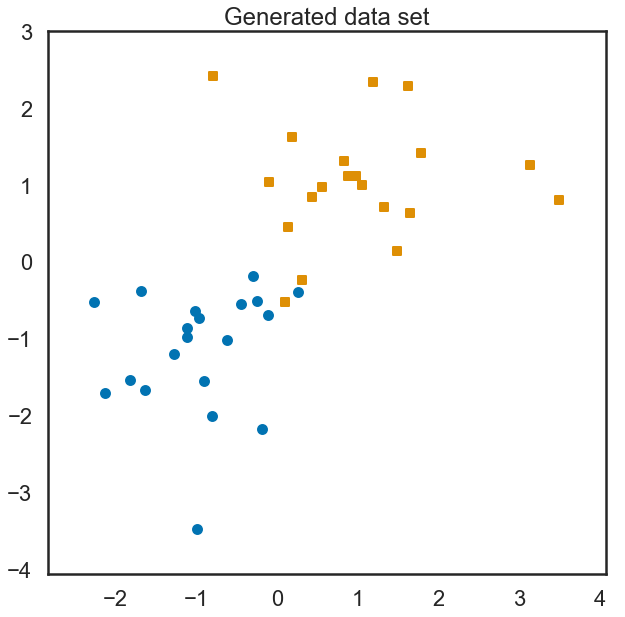

In [3]:
plt.figure(1, figsize=(10, 10))
plt.title('Generated data set')
plot_2d(X, y)

### Stochastic gradient descent visualization
A gradient descent is applied with the **mean squared error loss function** to balance the weitghs of a perceptron. Weights vector is initialized randomly.

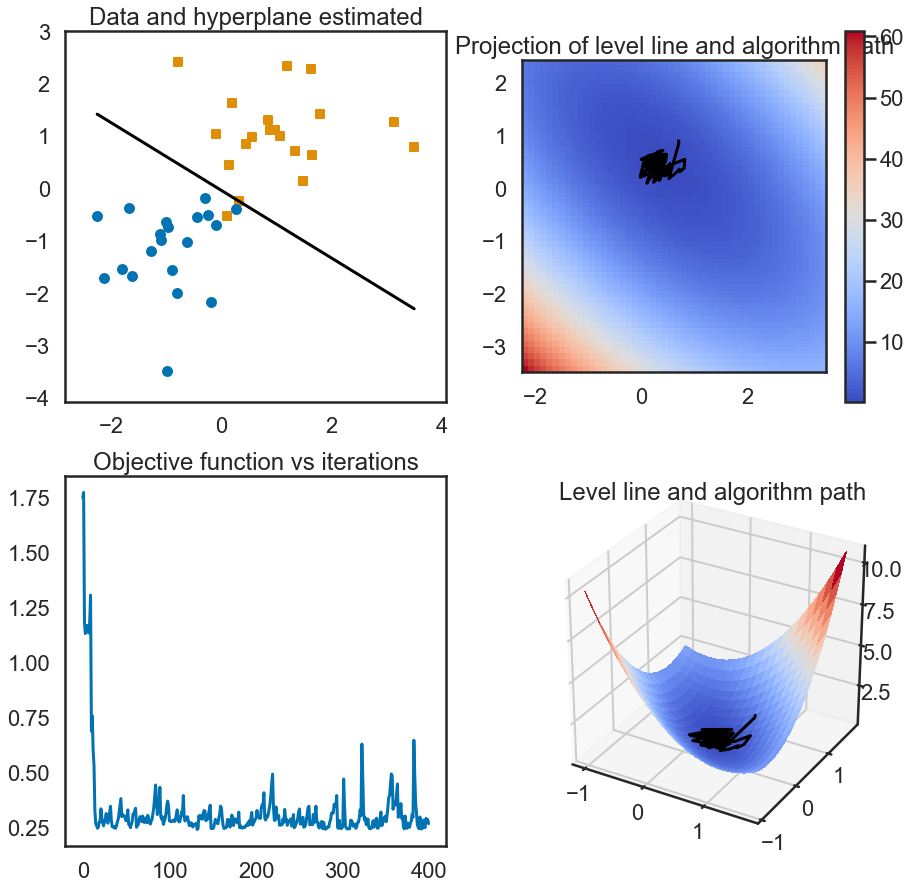

In [4]:
# Perceptron weights vector
w = np.random.randn(X.shape[1] + 1)

# Gradient descent parameters
nb_iter = 10
epsilon = 0.05

# Getting weights history and cost function history for plot
w_history, cost_history = gradient(X, y, epsilon, nb_iter * len(y), w, mse_loss,
                             gr_mse_loss, stochastic=True)

# Plot
plt.figure(figsize=(15, 15))
plot_gradient(X, y, w_history, cost_history, mse_loss)
plt.show()

### Using linear_model.SGDClassifier  
  

Linear model SGDClassifier is used to visualize a different linear frontier. 

(40000, 2)


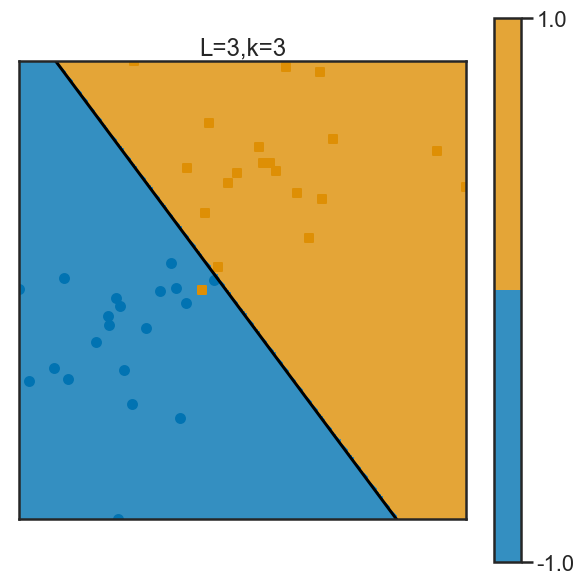

In [5]:
clf = linear_model.SGDClassifier(max_iter=15, tol=0)
clf.fit(X, y)

# Getting linear frontier coefficients
wsgd = [clf.intercept_[0], clf.coef_[0, 0], clf.coef_[0, 1]]

# Plot
plt.figure(figsize=(10,10))
frontiere_new(clf, X, y, wsgd, step=200, alpha_choice=1)
plt.show()